# EDA

In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.2/111.2 KB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 36.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 7.1 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
import datetime
from datetime import date, timedelta
today = date.today()

In [3]:
d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=5000)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2


In [4]:
data = yf.download('HDFCBANK.NS', start=start_date, end=end_date, progress=False)

In [5]:
data.shape

(3380, 6)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3380 entries, 2009-06-29 to 2023-03-03
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3380 non-null   float64
 1   High       3380 non-null   float64
 2   Low        3380 non-null   float64
 3   Close      3380 non-null   float64
 4   Adj Close  3380 non-null   float64
 5   Volume     3380 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 184.8 KB


In [7]:
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", 
             "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3375,2023-02-27,1585.900024,1599.000000,1577.300049,1592.900024,1592.900024,7156486
3376,2023-02-28,1592.000000,1605.300049,1588.699951,1599.599976,1599.599976,9496996
3377,2023-03-01,1612.000000,1613.000000,1595.750000,1598.050049,1598.050049,7068628
3378,2023-03-02,1594.000000,1605.949951,1582.000000,1584.449951,1584.449951,8695907
3379,2023-03-03,1596.000000,1620.000000,1588.000000,1615.900024,1615.900024,7493117


In [8]:
data


,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-06-29,150.500000,153.289993,149.199997,150.779999,137.684311,18100240
1,2009-06-30,152.395004,152.500000,147.925003,149.315002,136.346558,10292420
2,2009-07-01,149.800003,151.800003,148.315002,150.250000,137.200363,5927280
3,2009-07-02,150.899994,150.899994,146.524994,150.050003,137.017746,6792600
4,2009-07-03,148.990005,152.500000,148.300003,151.574997,138.410294,9805270
...,...,...,...,...,...,...,...
3375,2023-02-27,1585.900024,1599.000000,1577.300049,1592.900024,1592.900024,7156486
3376,2023-02-28,1592.000000,1605.300049,1588.699951,1599.599976,1599.599976,9496996
3377,2023-03-01,1612.000000,1613.000000,1595.750000,1598.050049,1598.050049,7068628
3378,2023-03-02,1594.000000,1605.949951,1582.000000,1584.449951,1584.449951,8695907


In [9]:
import plotly.graph_objects as go
figure = go.Figure(data=[go.Candlestick(x=data["Date"],
                                        open=data["Open"], 
                                        high=data["High"],
                                        low=data["Low"], 
                                        close=data["Close"])])
figure.update_layout(title = "HDFC Bank Stock Price Analysis", 
                     xaxis_rangeslider_visible=False)
figure.show()

In [10]:
correlation = data.corr()
print(correlation["Close"].sort_values(ascending=False))

Close        1.000000
Adj Close    0.999909
High         0.999875
Low          0.999847
Open         0.999709
Volume       0.099975
Name: Close, dtype: float64


In [12]:
X=data[['Volume','Open']]
y=data['Close']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()



# Linear Regression 

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

In [16]:
def prepare_data(df,forecast_col,forecast_out,test_size):
    label = df[forecast_col].shift(-forecast_out) #creating new column called label with the last 5 rows are nan
    X = np.array(df[[forecast_col]]) #creating the feature array
    X = preprocessing.scale(X) #processing the feature array
    X_lately = X[-forecast_out:] #creating the column i want to use later in the predicting method
    X = X[:-forecast_out] # X that will contain the training and testing
    label.dropna(inplace=True) #dropping na values
    y = np.array(label)  # assigning Y
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size, random_state=0) #cross validation

    response = [X_train,X_test , Y_train, Y_test , X_lately]
    return response

In [17]:
forecast_col = 'Close'
forecast_out = 5
test_size = 0.3

In [18]:
X_train, X_test, Y_train, Y_test , X_lately =prepare_data(data,forecast_col,forecast_out,test_size); #calling the method were the cross validation and data preperation is in
learner = LinearRegression() #initializing linear regression model

learner.fit(X_train,Y_train) #training the linear regression model

LinearRegression()

In [19]:
score=learner.score(X_test,Y_test)#testing the linear regression model
forecast= learner.predict(X_lately) #set that will contain the forecasted data
response={}#creting json object
response['test_score']=score
response['forecast_set']=forecast

print(response)

{'test_score': 0.9969790595257442, 'forecast_set': array([1595.48886184, 1602.19175338, 1600.64114641, 1587.03508016,
       1618.49895572])}


# SARIMA

In [20]:
data = data[["Date", "Close"]]
print(data.head())

        Date       Close
0 2009-06-29  150.779999
1 2009-06-30  149.315002
2 2009-07-01  150.250000
3 2009-07-02  150.050003
4 2009-07-03  151.574997


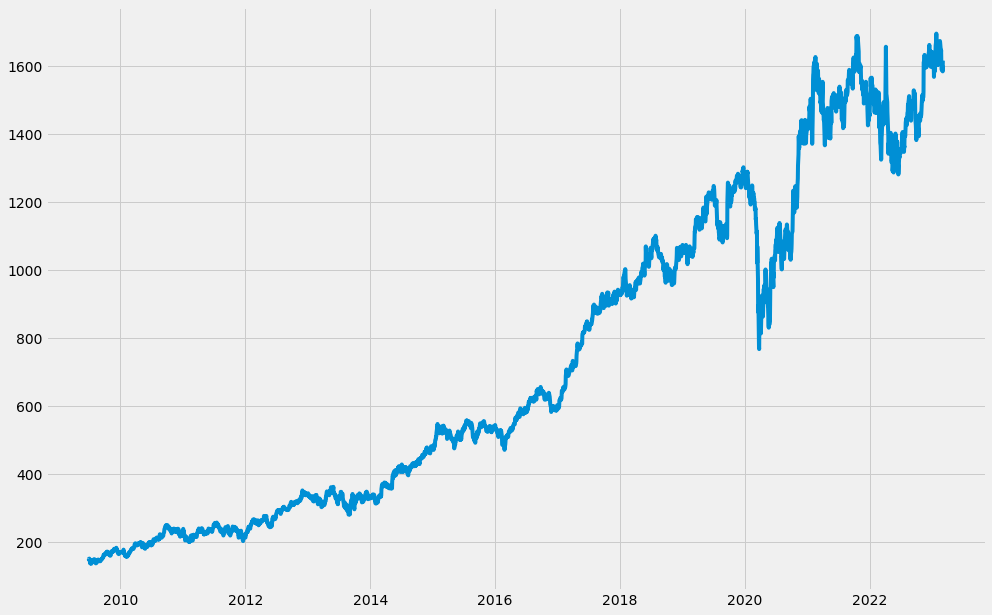

In [21]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.plot(data["Date"], data["Close"])

<Figure size 432x288 with 0 Axes>

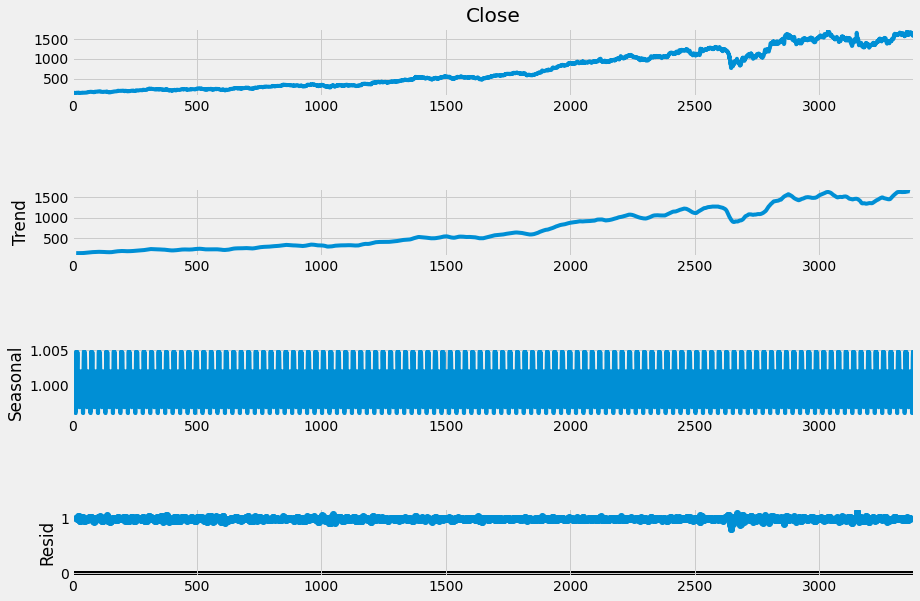

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data["Close"], 
                            model='multiplicative', period = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 10)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

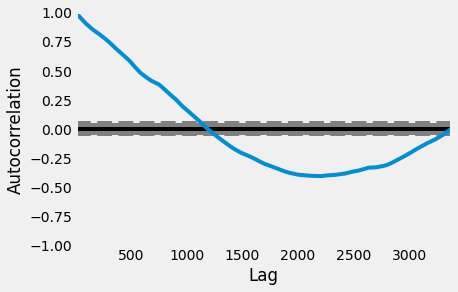

In [23]:
pd.plotting.autocorrelation_plot(data["Close"])

/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



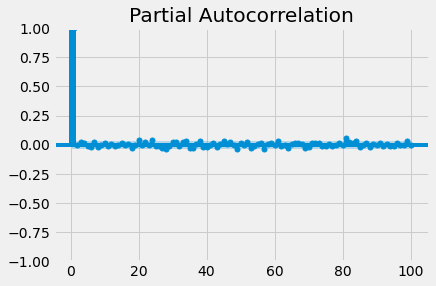

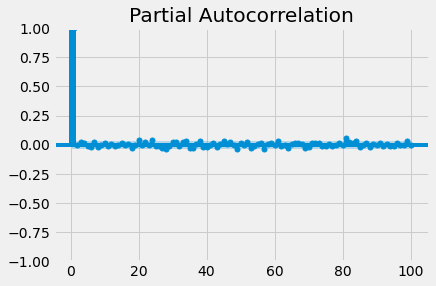

In [24]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data["Close"], lags = 100)

In [25]:
p, d, q = 1, 1, 2
import statsmodels.api as sm
import warnings
model=sm.tsa.statespace.SARIMAX(data['Close'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 3380
Model:             SARIMAX(1, 1, 2)x(1, 1, 2, 12)   Log Likelihood              -13458.909
Date:                            Mon, 06 Mar 2023   AIC                          26931.818
Time:                                    13:46:55   BIC                          26974.671
Sample:                                         0   HQIC                         26947.142
                                           - 3380                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2945      0.109      2.705      0.007       0.081       0.508
ma.L1         -0.2518      0.109   

In [26]:
predictions = model.predict(len(data), len(data)+10)
print(predictions)

3380    1619.360115
3381    1620.378499
3382    1619.141537
3383    1617.356820
3384    1616.907962
3385    1618.197606
3386    1618.842597
3387    1617.943034
3388    1617.776879
3389    1618.285506
3390    1620.165143
Name: predicted_mean, dtype: float64


<AxesSubplot:>

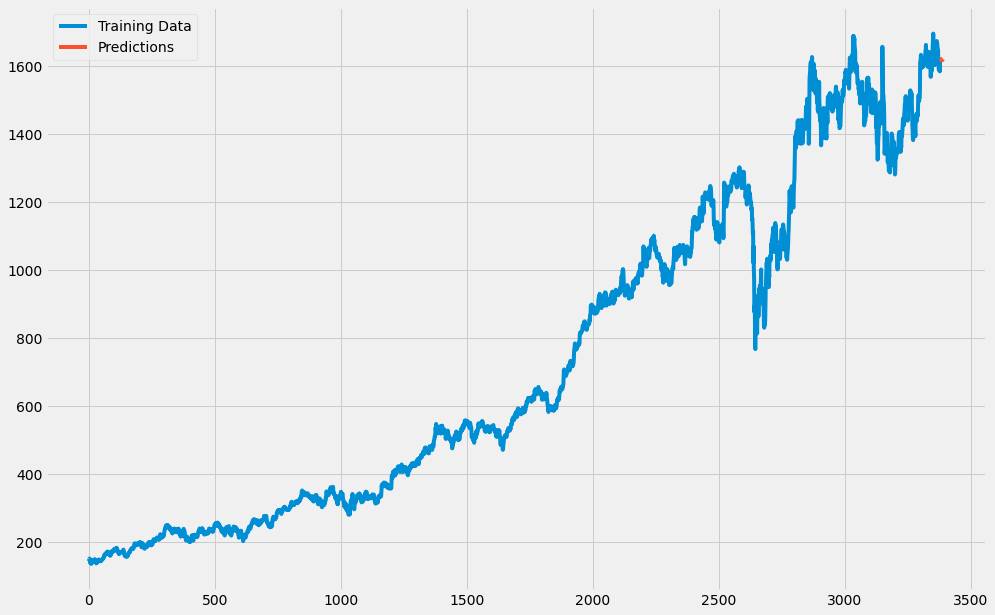

In [27]:
data["Close"].plot(legend=True, label="Training Data", figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")

In [28]:
from sklearn.metrics import accuracy_score